In [26]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [27]:
import pandas as pd
import numpy as np # Для графика нужен
from src.linear_regression import LinearRegression
from src.metrics import mse, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/Experience-Salary.csv")
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [5]:
X = df['exp(in months)'].tolist()
y = df['salary(in thousands)'].tolist()

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=9)

In [7]:
model = LinearRegression(learning_rate=0.001, n_iterations=5000)

In [12]:
model.fit(X_train, y_train);

In [13]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [14]:
print("=== МЕТРИКИ МОДЕЛИ ===")
print(f"Параметры модели: w = {model.w:.4f}, b = {model.b:.4f}")
print(f"Уравнение: y = {model.b:.2f} + {model.w:.2f}*x\n")

print("Обучающая выборка:")
print(f"MSE: {mse(y_train, y_pred_train):.4f}")
print(f"R²:  {r2_score(y_train, y_pred_train):.4f}")

print("Тестовая выборка:")
print(f"MSE: {mse(y_val, y_pred_val):.4f}")
print(f"R²:  {r2_score(y_val, y_pred_val):.4f}")

=== МЕТРИКИ МОДЕЛИ ===
Параметры модели: w = 0.8437, b = 4.6473
Уравнение: y = 4.65 + 0.84*x

Обучающая выборка:
MSE: 27.0971
R²:  0.6526
Тестовая выборка:
MSE: 25.5442
R²:  0.6754


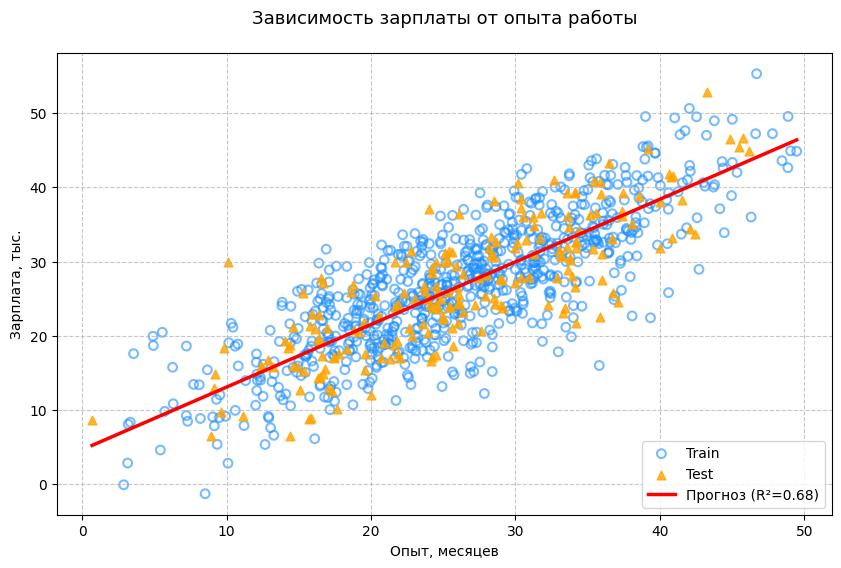

In [28]:
# Более яркий вариант
plt.figure(figsize=(10, 6))

# Точки с заливкой и контуром
plt.scatter(X_train, y_train, alpha=0.6, s=40,
            label='Train', facecolors='none', edgecolors='dodgerblue', linewidths=1.5)
plt.scatter(X_val, y_val, alpha=0.8, s=40,
            label='Test', color='orange', marker='^')

# Линия регрессии
X_line = np.linspace(min(X), max(X), 100)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, 'r-', linewidth=2.5,
         label=f'Прогноз (R²={r2_score(y_val, model.predict(X_val)):.2f})')

plt.xlabel('Опыт, месяцев')
plt.ylabel('Зарплата, тыс.')
plt.title('Зависимость зарплаты от опыта работы\n', fontsize=13)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()